# Sentiment Based Product Recommendation System

## *Problem Statement*

Design and Devlope a model that will improve the product recommendations given to the users given their past reviews and ratings whenever they shop on Ebuss E-Commerce Platform. This will lead to increasing the probability of a customers end up buying products without much effort and will eventually improve the sales for Ebuss

The sentiment-based product recommendation system, shall include the following items -
1. Data sourcing and sentiment analysis
2. Building a recommendation system
3. Improving the recommendations using the sentiment analysis model
4. Deploying the end-to-end project with a user interface

# Approch Followed 

### 1. Data Sourcing and Sentiment Analysis
       
   #### 1.1 Data Analysis
   
        - Loading the user review data and storing it in DataFrame 
        - Data Analysis to develop data understanding and familiarity
        - Handling Missing Values
        - Removing Redundant attributes     
   
   #### 1.2 Exploratory Data Analysis (EDA)
   
        - Univariate analysis for categorical column
        - Bi-VArient analysis of attributes
        - Identification of Top occuring words/phases using word cloud
        - Analysing reason behind user sentiments and how reviews are framed & drawing insights accordingly       
       
   #### 1.3 Data Preperation & Cleansing
   
        - Data Analysis to develop data understanding and familiarity
        - Handling Missing Values
        - Removing redundant attributes
        - Data Cleansing which directly impacts the model performance and insights come out more clearly
        - Text processing using Tokenization & Lemmitization of User Reviews
        - Removing stopwords & puntuations from reviews

   #### 1.4 Feature Extraction 
   
        - Using Count Vectorizer to process the text information
        - Text data is transformed into matrix of token counts

   #### 1.5 Model Building & Evaluation
   
    - Logistic Regression Model Building & Performance Evaluation
	- Decision Tree Model Building & Performance Evaluation
	- Random Forest Building & Performance Evaluation
    - XG Boost Model & Performance Evaluation
    - Gaussian Naive Bayes Model & Performance Evaluation
    - Identification of best performing model    

### 2. Building Recommendation System

   #### 2.1 User-based recommendation system
   
   - Ratings provided by users on different products is used to form correlation is identified between users 
   - Leveraging this information to recommend products 
   
   #### 2.2 Item-based recommendation system
   
   - Similarity/Correlation determination between products
   - Leveraging this information to recommend products 
   
   #### 2.3 Recomendation System Evaluation & Selecting Best One 
   
   - Calculation of Root Mean Square Error (RMSE) for both approaches 
   - Selecting the best approach based on lowest RMSE value  


### 3. Integration of Sentiment Model & User Recommendation System
   
     - The user's ID is used to fetch the recommended products based on user similarity matrix.
     - Reviews for these products are prcessed by sentiment model to predict the sentiment 
     - Top 5 products are selected by sorting the products sentimenets (positve) in descending order

### 4. Deployment

  #### 4.1 Model Deploymet using Flask & Heroku

### 5. Conclusion

     - The user review data set was analyzed deeply to understand data & nuances present 
     - The EDA was performed on data and insights were generated 
     - The data was processed & cleansed to elimate data nuances & useful information was drawn 
     - The sentiment model was devloped using multiple ML Algorithms & best performing model was identified & selected 
     - Both User recommendation system i.e. User based & Item based system was devleoped & best performing model was selected 
     - Sentiment model & Reommendation system was integrated to suggest/predict top 5 products that customer can buy
     - The solution has been deployed using Flask & Heroku with an UI
     - As a end result, the UI developed can be used by user to enter User ID & system will predict the top buys for customer 


### 1. Data Sourcing and Sentiment Analysis

In [1]:
# Importing the relevant libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',500)

import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint
from spellchecker import SpellChecker

pd.set_option('display.max_columns', 100)

from datetime import datetime

from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import string


from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import joblib
import pickle
import requests


Bad key "text.kerning_factor" on line 4 in
C:\Users\Vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


#### 1.1 Data Analysis

In [2]:
##Loading the User Review Dataset(contained in CSV file)
review_data=pd.read_csv('sample30.csv')

In [3]:
##Observe data
review_data.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [4]:
## Check the Shape/Dimension of data
review_data.shape

(30000, 15)

In [5]:
# Analyzing Type & number of values for each field
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [6]:
# Cheking number of missing values for each coloumn
Missing_Value=review_data.isnull().sum().reset_index()
Missing_Value.columns=['Column Name','Missing Value Count']
Missing_Value[Missing_Value['Missing Value Count']>0].sort_values(by='Missing Value Count',ascending=False)

,Column Name,Missing Value Count
12,reviews_userProvince,29830
11,reviews_userCity,28071
6,reviews_didPurchase,14068
7,reviews_doRecommend,2570
10,reviews_title,190
3,manufacturer,141
13,reviews_username,63
5,reviews_date,46
14,user_sentiment,1


In [7]:
# Calculating missing values in terms of percentage
round(100*(review_data.isnull().sum()/len(review_data.index)), 2)

id                       0.00
brand                    0.00
categories               0.00
manufacturer             0.47
name                     0.00
reviews_date             0.15
reviews_didPurchase     46.89
reviews_doRecommend      8.57
reviews_rating           0.00
reviews_text             0.00
reviews_title            0.63
reviews_userCity        93.57
reviews_userProvince    99.43
reviews_username         0.21
user_sentiment           0.00
dtype: float64

In [8]:
#Dropping redundant columns from data set as null percentage for these columns is very high
columns_to_drop = ['reviews_userProvince','reviews_userCity']
review_data.drop(columns_to_drop, axis=1, inplace=True)
review_data.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative


In [9]:
#Check possible user sentiments based on different ratings
review_data[review_data['reviews_didPurchase']==True][['reviews_rating','user_sentiment']].drop_duplicates().sort_values(by='reviews_rating',ascending=False)

,reviews_rating,user_sentiment
1,5,Positive
840,5,Negative
36,4,Positive
182,4,Negative
18,3,Positive
1039,3,Negative
41,2,Negative
1038,2,Positive
40,1,Negative
1426,1,Positive


##### * Observations
Even for 5 or 4 ratings users have both positive & negative sentiments. This is unusual as if a customer is giving 5 or 4 star rating then the sentiment shall be positive

In [10]:
#Check the value counts for reviews provided by users that have actually purchased the product
review_data.reviews_didPurchase.value_counts()

False    14498
True      1434
Name: reviews_didPurchase, dtype: int64

In [11]:
#Check the value counts for possible brands that exists in dataset 
review_data['brand'].value_counts()

Clorox                            10585
Warner Home Video                  3325
Disney                             1200
L'oreal Paris                      1186
FOX                                 887
Burt's Bees                         881
Sony Pictures                       845
Summit Entertainment                813
Nexxus                              693
Universal Home Video                668
Olay                                637
Warner Bros.                        458
Lundberg                            414
Clear Scalp & Hair Therapy          372
Hoover                              362
Windex                              348
Avery                               314
Aveeno                              313
Pendaflex                           310
Tostitos                            286
Storkcraft                          264
Vaseline                            254
Just For Men                        224
Warner Music Group                  204
Hormel                              196


In [12]:
#Check the value counts for user sentiments
review_data['user_sentiment'].value_counts()

Positive    26632
Negative     3367
Name: user_sentiment, dtype: int64

##### * Observation
It has been observed that ~26.6k samples corresponds to positive sentiments & only ~3.3k reviews are of negative sentiments.
In general user rate or review products that they find useful (mostly) and in some cases give negative reviews if they have bad experience

In [13]:
#Check the value counts for review ratings
review_data['reviews_rating'].value_counts()

5    20831
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

#### 1.2 Exploratory Data Analysis (EDA)

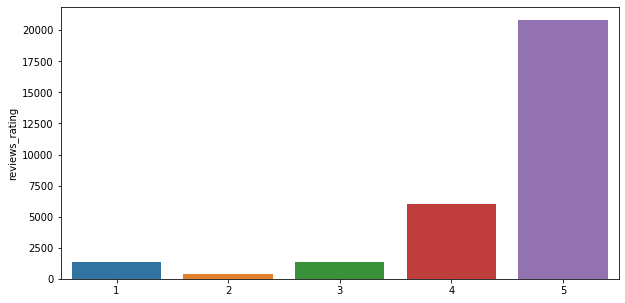

In [14]:
## Analyze rating's using bar plot
plt.figure(figsize=[10,5])
sns.barplot(x=review_data['reviews_rating'].value_counts().index,y=review_data['reviews_rating'].value_counts())
plt.show()

##### * Observation
Majority ratings corresponds to 5 & 4 (Top 2) and rating 2 followed by 1 is the lowest 

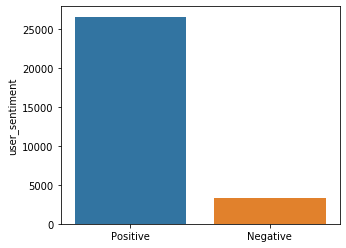

In [15]:
## Analyze user sentiments using bar plot
plt.figure(figsize=[5,4])
sns.barplot(x=review_data['user_sentiment'].value_counts().index,y=review_data['user_sentiment'].value_counts())
plt.show()

##### *Observations 
There is classimbalance in dataset becasue positive sentiments is in majority whearas negative sentiments are very less in number as compared to positive.
The Imbalance needs to factored in while training a Machine Learning Model 

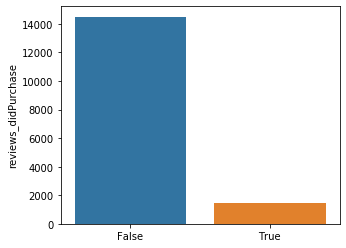

In [16]:
## Analyze number of reviews where user might/might not have purchased the product but still has given reviews
plt.figure(figsize=[5,4])
sns.barplot(x=review_data['reviews_didPurchase'].value_counts().index,y=review_data['reviews_didPurchase'].value_counts())
plt.show()

In [17]:
##There might be some fake reviews i.e. customer haven't purchased the product still gives a bised review 
review_data['reviews_didPurchase'].fillna("No Review",inplace=True)

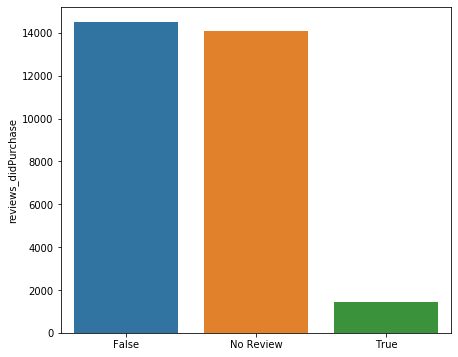

In [18]:
## Analyze if scenarios wherein customer haven't purchased the product still gives a bised review. Also populating the null values as No Reviews
plt.figure(figsize=[7,6])
sns.barplot(x=review_data['reviews_didPurchase'].value_counts().index,y=review_data['reviews_didPurchase'].value_counts())
plt.show()

##### * Observations
It has been observed that scenarios do exists where reviews are given by users on products that are not even purchased by them 

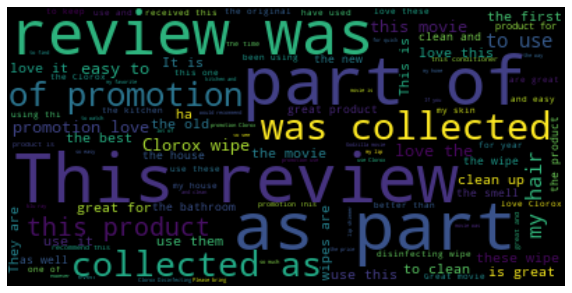

In [19]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import rcParams
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(' '.join(review_data['reviews_text']))
rcParams['figure.figsize'] = 10, 20
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### 1.3 Data Preperation & Cleansing

In [20]:
##Add a column for review length & Create new column named as "updated_review" by concatinating review text and title
review_data["reviews_length"]=review_data['reviews_text'].astype(str).apply(len)
review_data["updated_review"]=review_data[['reviews_title', 'reviews_text']].apply(lambda x: ','.join(x.dropna()), axis=1)

In [21]:
review_data.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_length,updated_review
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,No Review,NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive,201,"Just Awesome,i love this album. it's very good..."
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,62,"Good,Good flavor. This review was collected as..."
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,Positive,12,"Good,Good flavor."
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative,696,"Disappointed,I read through the reviews on her..."
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative,132,"Irritation,My husband bought this gel for us. ..."


In [22]:
##Function tokentize user reviews & storing tokenized text in a list named document
documents = []
for i in tqdm(range(len(review_data['updated_review']))):
    documents.append(word_tokenize(review_data.iloc[i]['updated_review']))
documents[0:5]

100%|██████████| 30000/30000 [00:20<00:00, 1488.24it/s]


[['Just',
  'Awesome',
  ',',
  'i',
  'love',
  'this',
  'album',
  '.',
  'it',
  "'s",
  'very',
  'good',
  '.',
  'more',
  'to',
  'the',
  'hip',
  'hop',
  'side',
  'than',
  'her',
  'current',
  'pop',
  'sound..',
  'SO',
  'HYPE',
  '!',
  'i',
  'listen',
  'to',
  'this',
  'everyday',
  'at',
  'the',
  'gym',
  '!',
  'i',
  'give',
  'it',
  '5star',
  'rating',
  'all',
  'the',
  'way',
  '.',
  'her',
  'metaphors',
  'are',
  'just',
  'crazy',
  '.'],
 ['Good',
  ',',
  'Good',
  'flavor',
  '.',
  'This',
  'review',
  'was',
  'collected',
  'as',
  'part',
  'of',
  'a',
  'promotion',
  '.'],
 ['Good', ',', 'Good', 'flavor', '.'],
 ['Disappointed',
  ',',
  'I',
  'read',
  'through',
  'the',
  'reviews',
  'on',
  'here',
  'before',
  'looking',
  'in',
  'to',
  'buying',
  'one',
  'of',
  'the',
  'couples',
  'lubricants',
  ',',
  'and',
  'was',
  'ultimately',
  'disappointed',
  'that',
  'it',
  'did',
  "n't",
  'even',
  'live',
  'up',
  'to',

In [23]:
#Function to process the text data in cleaning using lemmitization & Stop word removal clean
#Along with this punctuations are also removed from the text data

stops = set(stopwords.words("english"))
punctuations = list(string.punctuation)
stops.update(punctuations)

def get_simple_pos(tag):
    if tag.startswith("J"):
        return wordnet.ADJ
    elif tag.startswith("V"):
        return wordnet.VERB
    elif tag.startswith("N"):
        return wordnet.NOUN
    elif tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()

def clean_text(words):
    output_words = []
    for w in words:
        if w.lower() not in stops:
            pos = pos_tag(w)
            clean_words = lemmatizer.lemmatize(w,pos = get_simple_pos(pos[0][0]))
            output_words.append(clean_words)
    return output_words

In [24]:
##Calling function to clean reviews 
documents = [clean_text(words) for words in tqdm(documents)]

100%|██████████| 30000/30000 [10:31<00:00, 47.54it/s] 


In [25]:
##Function to tokenize the original user reviews 
raw_documents = []
for i in tqdm(range(len(review_data['updated_review']))):
    raw_documents.append(word_tokenize(review_data.iloc[i]['updated_review']))
raw_documents[0:5]

100%|██████████| 30000/30000 [00:17<00:00, 1668.43it/s]


[['Just',
  'Awesome',
  ',',
  'i',
  'love',
  'this',
  'album',
  '.',
  'it',
  "'s",
  'very',
  'good',
  '.',
  'more',
  'to',
  'the',
  'hip',
  'hop',
  'side',
  'than',
  'her',
  'current',
  'pop',
  'sound..',
  'SO',
  'HYPE',
  '!',
  'i',
  'listen',
  'to',
  'this',
  'everyday',
  'at',
  'the',
  'gym',
  '!',
  'i',
  'give',
  'it',
  '5star',
  'rating',
  'all',
  'the',
  'way',
  '.',
  'her',
  'metaphors',
  'are',
  'just',
  'crazy',
  '.'],
 ['Good',
  ',',
  'Good',
  'flavor',
  '.',
  'This',
  'review',
  'was',
  'collected',
  'as',
  'part',
  'of',
  'a',
  'promotion',
  '.'],
 ['Good', ',', 'Good', 'flavor', '.'],
 ['Disappointed',
  ',',
  'I',
  'read',
  'through',
  'the',
  'reviews',
  'on',
  'here',
  'before',
  'looking',
  'in',
  'to',
  'buying',
  'one',
  'of',
  'the',
  'couples',
  'lubricants',
  ',',
  'and',
  'was',
  'ultimately',
  'disappointed',
  'that',
  'it',
  'did',
  "n't",
  'even',
  'live',
  'up',
  'to',

In [26]:
##observe a random raw user review
' '.join(raw_documents[0])

"Just Awesome , i love this album . it 's very good . more to the hip hop side than her current pop sound.. SO HYPE ! i listen to this everyday at the gym ! i give it 5star rating all the way . her metaphors are just crazy ."

In [27]:
##observe same user review that has been processed and cleaned
' '.join(documents[0])

"Awesome love album 's good hip hop side current pop sound.. HYPE listen everyday gym give 5star rating way metaphor crazy"

In [28]:
#Creating a new column named "cleaned_reviews" in data frame to store processed & clean reviews 
review_data['cleaned_reviews']=[' '.join(documents[i]) for i in range(len(documents))]

In [29]:
##Validate Dataframe
review_data.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_length,updated_review,cleaned_reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,No Review,NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive,201,"Just Awesome,i love this album. it's very good...",Awesome love album 's good hip hop side curren...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,62,"Good,Good flavor. This review was collected as...",Good Good flavor review collected part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,Positive,12,"Good,Good flavor.",Good Good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative,696,"Disappointed,I read through the reviews on her...",Disappointed read review looking buying one co...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative,132,"Irritation,My husband bought this gel for us. ...",Irritation husband bought gel u gel caused irr...


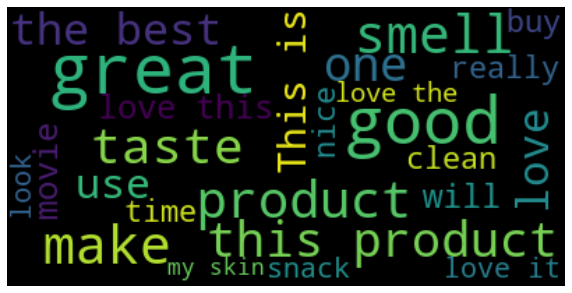

In [30]:
#Analyze top 25 occuring words when Positive user reviews are given
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import rcParams
wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="black").generate(' '.join(review_data[(review_data['reviews_didPurchase']==True)&(review_data['user_sentiment']=='Positive')&
            (review_data['reviews_rating']>=4)]['reviews_text']))
rcParams['figure.figsize'] = 10, 20
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##### * Observation
Top occuring words in case of positive reviews are good, great, love which is very relevant & some of the commonly used words 

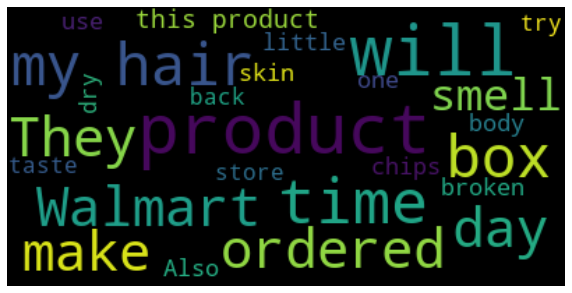

In [31]:
#Analyze top 25 occuring words when Negative user reviews are given
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import rcParams
wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="black").generate(' '.join(review_data[(review_data['reviews_didPurchase']==True)&(review_data['user_sentiment']=='Negative')&
            (review_data['reviews_rating']<4)]['reviews_text']))
rcParams['figure.figsize'] = 10, 20
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##### * Observation
Top occuring words in case of negative reviews are broken, try, little, back etc. This shows that users are giving their geniuine feedbacks/experinces instead of giving Negative reviews or using bad words

In [32]:
#Code to find the top 30 unigram frequency among the complaints in the cleaned datafram(review_data). 
from nltk.util import ngrams
import nltk, re, string, collections
text=' '.join(review_data['cleaned_reviews'])
tokenized = text.split()
esBigrams = ngrams(tokenized, 1)
esBigramFreq = collections.Counter(esBigrams)
esBigramFreq.most_common(30)

[(('product',), 11153),
 (('movie',), 9862),
 (('review',), 9404),
 (('part',), 9182),
 (('promotion',), 8748),
 (('collected',), 8745),
 (('great',), 8132),
 (('use',), 8019),
 (('love',), 7515),
 (('wipe',), 6619),
 (('Great',), 6563),
 (('clean',), 5633),
 (("n't",), 5596),
 (('good',), 4824),
 (('hair',), 4717),
 (('like',), 4590),
 (('Clorox',), 4537),
 (("'s",), 4475),
 (('one',), 3695),
 (('smell',), 3651),
 (('Love',), 3549),
 (('easy',), 3079),
 (('time',), 2842),
 (('...',), 2757),
 (('really',), 2655),
 (('would',), 2535),
 (('using',), 2527),
 (('make',), 2496),
 (('Godzilla',), 2451),
 (('work',), 2429)]

In [33]:
#Print the top 10 words in the unigram frequency
for i in esBigramFreq.most_common(10):
    print(i[0][0])

product
movie
review
part
promotion
collected
great
use
love
wipe


In [34]:
#Code to find the top 30 bigram frequency among the complaints in the cleaned datafram(review_data). 
from nltk.util import ngrams
import nltk, re, string, collections
text=' '.join(review_data['cleaned_reviews'])
tokenized = text.split()
esBigrams = ngrams(tokenized, 2)
esBigramFreq = collections.Counter(esBigrams)
esBigramFreq.most_common(30)

[(('review', 'collected'), 8743),
 (('collected', 'part'), 8743),
 (('part', 'promotion'), 8743),
 (('Clorox', 'wipe'), 1439),
 (('easy', 'use'), 1197),
 (('promotion', 'Great'), 1114),
 (('Great', 'movie'), 946),
 (('promotion', 'Love'), 763),
 (('promotion', 'Clorox'), 761),
 (('Clorox', 'Wipes'), 691),
 (('Great', 'product'), 680),
 (('great', 'product'), 679),
 (('clorox', 'wipe'), 650),
 (('love', 'product'), 640),
 (('smell', 'great'), 603),
 (('ca', "n't"), 601),
 (('Great', 'Product'), 571),
 (('love', 'Clorox'), 528),
 (('great', 'movie'), 513),
 (('received', 'product'), 509),
 (('bring', 'back'), 489),
 (('Godzilla', 'movie'), 477),
 (('movie', 'great'), 462),
 (('good', 'movie'), 457),
 (('disinfecting', 'wipe'), 454),
 (('old', 'formula'), 434),
 (('kitchen', 'bathroom'), 433),
 (('use', 'wipe'), 420),
 (('use', 'Clorox'), 417),
 (('product', 'use'), 416)]

In [35]:
#Code to find the top 30 trigram frequency among the complaints in the cleaned datafram(review_data). 
from nltk.util import ngrams
import nltk, re, string, collections
text=' '.join(review_data['cleaned_reviews'])
tokenized = text.split()
esBigrams = ngrams(tokenized, 3)
esBigramFreq = collections.Counter(esBigrams)
esBigramFreq.most_common(30)

[(('review', 'collected', 'part'), 8743),
 (('collected', 'part', 'promotion'), 8743),
 (('part', 'promotion', 'Great'), 1114),
 (('part', 'promotion', 'Love'), 763),
 (('part', 'promotion', 'Clorox'), 761),
 (('product', 'review', 'collected'), 382),
 (('clean', 'review', 'collected'), 319),
 (('promotion', 'Great', 'Product'), 306),
 (('promotion', 'Clorox', 'Wipes'), 304),
 (('...', '...', '...'), 261),
 (('Clorox', 'Disinfecting', 'Wipes'), 256),
 (('opinion', 'review', 'collected'), 246),
 (('part', 'promotion', 'love'), 241),
 (('use', 'review', 'collected'), 237),
 (('Please', 'bring', 'back'), 236),
 (('part', 'promotion', 'Awesome'), 221),
 (('love', 'Clorox', 'wipe'), 217),
 (('part', 'promotion', 'great'), 213),
 (('received', 'product', 'free'), 207),
 (('use', 'Clorox', 'wipe'), 204),
 (('part', 'promotion', 'Easy'), 201),
 (('promotion', 'Great', 'product'), 198),
 (('part', 'promotion', 'Best'), 188),
 (('back', 'old', 'formula'), 181),
 (('testing', 'purpose', 'opinion'

#### 1.4 Feature Extraction

In [36]:
#Code to initialise the TfidfVectorizer 
vect = TfidfVectorizer(stop_words='english',max_df=0.95,min_df = 2)

In [37]:
#Code to create the Document Term Matrix by transforming the cleaned_reviews column present in review_data
X = vect.fit_transform(review_data['cleaned_reviews'])
pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

,00,000,0000,007,09,10,100,1000,10281,1080,1080p,10x,11,110,12,1200,12443842,127201,12lbs,13,130,1300,1375,14,140,149,15,150,1500,16,160,17,18,180,1800,184,186,188,189,18yrs,19,190,1950,1950s,1954,1960,1960s,1964,1970,1975,...,yellowish,yep,yes,yesterday,yesteryear,yield,yo,yogurt,yon,yor,york,yorkies,young,younger,youngest,youngster,youre,youth,youthful,youtube,yr,yrs,ysl,yu,yuck,yucky,yuk,yum,yummm,yummy,yup,zac,zach,zack,zero,zesty,zilla,zinc,zing,zip,zipcode,ziploc,zipper,zit,zojirushi,zombie,zombies,zone,zoo,zyrtec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.

In [38]:
#Creating a new dataframe (training_data) to store only reviews (prpcessed & cleaned) & User sentiments
training_data=review_data[['cleaned_reviews','user_sentiment']]

In [39]:
#Mapping postive sentiments with 1 & negative with 0
Sentiments = {'Positive':'1','Negative':'0'}
review_data['user_sentiment'] = review_data['user_sentiment'].map(Sentiments)

In [40]:
#Validate the DataFrame
review_data.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_length,updated_review,cleaned_reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,No Review,NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1,201,"Just Awesome,i love this album. it's very good...",Awesome love album 's good hip hop side curren...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,dorothy w,1,62,"Good,Good flavor. This review was collected as...",Good Good flavor review collected part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,1,12,"Good,Good flavor.",Good Good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,rebecca,0,696,"Disappointed,I read through the reviews on her...",Disappointed read review looking buying one co...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,0,132,"Irritation,My husband bought this gel for us. ...",Irritation husband bought gel u gel caused irr...


In [41]:
##Eliminate review where sentiment is null
review_data=review_data[~review_data.user_sentiment.isnull()]

In [42]:
#Split the data(reviews and sentiment) in train & test 
x_train,x_test,y_train,y_test=train_test_split(review_data['cleaned_reviews'],review_data['user_sentiment'])

In [43]:
##Initalize Count Vectorizer and fit transform the train data
count_vec=CountVectorizer(max_features=10000)
x_train_features=count_vec.fit_transform(x_train)

In [44]:
##Store the trained count vectorizer as a pickle file
joblib.dump(count_vec,'count_vectorizer.pkl')

['count_vectorizer.pkl']

In [45]:
##Importing SMOTE 
from imblearn.over_sampling import SMOTE

In [46]:
##Fit the data for fixing class imbalance
smote = SMOTE(sampling_strategy='auto')
x_train_new,y_train_new = smote.fit_resample(x_train_features,y_train)

In [47]:
#Check the split between sentiments before fixing class imbalance
y_train.value_counts()

1    19965
0     2534
Name: user_sentiment, dtype: int64

In [48]:
#Check the split between sentiments after fixing class imbalance
y_train_new.value_counts()

0    19965
1    19965
Name: user_sentiment, dtype: int64

In [49]:
#Check dimension of train data
x_train_new

<39930x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 696017 stored elements in Compressed Sparse Row format>

In [50]:
##Transform the new train element
x_train_new.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
#Analyze the feature names selected by count vectorizer
count_vec.get_feature_names()

['00',
 '000',
 '0000',
 '007',
 '04',
 '07',
 '079',
 '09',
 '10',
 '100',
 '1000',
 '100free',
 '100percent',
 '10281',
 '1040',
 '107',
 '1080',
 '1080p',
 '1099s',
 '10am',
 '10ish',
 '10min',
 '10mo',
 '10x',
 '10year',
 '11',
 '110',
 '11196',
 '113',
 '11320',
 '11321',
 '1138',
 '1183',
 '11x14',
 '11yr',
 '12',
 '120',
 '1200',
 '120mg',
 '122016',
 '12443842',
 '127201',
 '12lbs',
 '12months',
 '12th',
 '13',
 '130',
 '1300',
 '1375',
 '14',
 '140',
 '15',
 '150',
 '1500',
 '16',
 '160',
 '17',
 '18',
 '1800',
 '184',
 '186',
 '188',
 '19',
 '1917',
 '1918',
 '1921',
 '1931',
 '1935',
 '1941',
 '1949',
 '195',
 '1950',
 '1950s',
 '1953',
 '1954',
 '1956',
 '1960s',
 '1961',
 '1964',
 '1965',
 '1970',
 '1970s',
 '1971',
 '1975',
 '19800',
 '19800702984',
 '1980s',
 '1982',
 '1983',
 '1984',
 '1985',
 '1988',
 '1990',
 '1990s',
 '1994',
 '1996',
 '1997',
 '1998',
 '1999',
 '19mo',
 '19th',
 '1g',
 '1hour',
 '1hr',
 '1k',
 '1keywordsvegeta',
 '1s',
 '1st',
 '1t',
 '1tsp',
 '1x',

In [52]:
#transform the test data using the trained count vectorizer
x_test_features=count_vec.transform(x_test)

In [53]:
#Check dimension of test data
x_test_features

<7500x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 126048 stored elements in Compressed Sparse Row format>

#### 1.5 Model Building & Evaluation

1. Logistic Regression Model Building & Performance Evaluation

In [54]:
##Build Logistic Regression model and fit train data
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train_new,y_train_new)

LogisticRegression()

In [55]:
#Check the model score
clf.score(x_train_new,y_train_new)

0.9668920611069372

In [56]:
#Prediction on train data
y_train_pred=clf.predict(x_train_new)

In [57]:
#Prediction on test data
y_test_pred=clf.predict(x_test_features)

In [58]:
##Evaluate Logistic Regression Model Performance
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.56      0.65      0.60       833
           1       0.96      0.94      0.95      6667

    accuracy                           0.90      7500
   macro avg       0.76      0.79      0.77      7500
weighted avg       0.91      0.90      0.91      7500



##### * Observation
The overall performace of Logistic Regrssion Model is pretty good as it's accuracy is 90% and Precision & recall for 0 & 1 is (0.56,0.65) & (0.96,0.94) which is good

2. Decision Tree Model Building & Performance Evaluation

In [59]:
##Build Decision Tree and fit train data
from sklearn.tree import DecisionTreeClassifier
clf_Decision_Tree=DecisionTreeClassifier()
clf_Decision_Tree.fit(x_train_new,y_train_new)

DecisionTreeClassifier()

In [60]:
#Prediction on train data
y_train_pred=clf_Decision_Tree.predict(x_train_new)

In [61]:
#Prediction on test data
y_test_pred=clf_Decision_Tree.predict(x_test_features)

In [62]:
##Evaluate Decision Tree Classifier Performance
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.42      0.57      0.49       833
           1       0.94      0.90      0.92      6667

    accuracy                           0.87      7500
   macro avg       0.68      0.74      0.70      7500
weighted avg       0.89      0.87      0.87      7500



###### * Observation

The overall performace of Decision Tree Classifier is good but is less when compared with Logistic Regression Model. Precision & recall for 0 & 1 is (0.42,0.58) & (0.94,0.90) which is good

3. Random Forest Building & Performance Evaluation

In [63]:
##Build Random Forest Classifier and fit train data
from sklearn.ensemble import RandomForestClassifier
clf_Random_Forest_Class=RandomForestClassifier(random_state=0)
clf_Random_Forest_Class.fit(x_train_new,y_train_new)

RandomForestClassifier(random_state=0)

In [64]:
#Prediction on train data
y_train_pred=clf_Random_Forest_Class.predict(x_train_new)

In [65]:
#Prediction on test data
y_test_pred=clf_Random_Forest_Class.predict(x_test_features)

In [66]:
#Evaluate Model Score on train and test data
clf_Random_Forest_Class.score(x_train_new,y_train_new),clf_Random_Forest_Class.score(x_test_features,y_test)

(0.9994991234660656, 0.9045333333333333)

In [67]:
##Evaluate Random Forest Classifier Performance
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.58      0.50      0.54       833
           1       0.94      0.96      0.95      6667

    accuracy                           0.90      7500
   macro avg       0.76      0.73      0.74      7500
weighted avg       0.90      0.90      0.90      7500



##### * Observation

The overall performace of Random Forest Classifier is pretty good as it's accuracy is 90% and Precision & recall for 0 & 1 is (0.58,0.50) & (0.94,0.96) which is good.
The model is almost at par with Logistic Regression model when overall accuracy is considered but it's precision & recall for negative sentiment is less than Logistic Regression model

4. XG Boost Model & Performance Evaluation

In [68]:
##Build XG Boost model and fit train data
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)
xgb.fit(x_train_new,y_train_new)

XGBClassifier()

In [69]:
#Prediction on train data
y_train_pred=xgb.predict(x_train_new)

In [70]:
#Prediction on test data
y_test_pred=xgb.predict(x_test_features)

In [71]:
#Evaluate Model Score on train and test data
xgb.score(x_train_new,y_train_new),xgb.score(x_test_features,y_test)

(0.9114450288004007, 0.8762666666666666)

In [72]:
#Evaluate Model Score performance
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.45      0.48      0.46       833
           1       0.93      0.93      0.93      6667

    accuracy                           0.88      7500
   macro avg       0.69      0.70      0.70      7500
weighted avg       0.88      0.88      0.88      7500



##### * Observation

The overall performace of XG Boost model is good as it's accuracy is 88% and Precision & recall for 0 & 1 is (0.45,0.48) & (0.93,0.93) which is good but not better than other models evaluated above

5. Gaussian Naive Bayes Model & Performance Evaluation

In [73]:
##Build XG Boost model and fit train data
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
# fit the model
NaiveBayes.fit(x_train_new.todense(), y_train_new)

GaussianNB()

In [74]:
#Prediction on train data
y_train_pred=NaiveBayes.predict(x_train_new.todense())

In [75]:
#Prediction on test data
y_test_pred=NaiveBayes.predict(x_test_features.todense())

In [76]:
#Evaluate Model Score on train and test data
NaiveBayes.score(x_train_new.todense(),y_train_new),NaiveBayes.score(x_test_features.todense(),y_test)

(0.7191084397695968, 0.42866666666666664)

In [77]:
#Evaluate Model Score performance
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.12      0.66      0.20       833
           1       0.90      0.40      0.55      6667

    accuracy                           0.43      7500
   macro avg       0.51      0.53      0.38      7500
weighted avg       0.82      0.43      0.52      7500



##### * Observation

The overall performace of Naive Bayes model is average as it's accuracy is ~44% and Precision & recall for 0 & 1 is (0.12,0.65) & (0.90,0.40) which is lowest amongst all the models.

##### Best Performing Model

Among all the 5 Machine learning model developed & evaluated above, the best one is logistic regression which have a overall accuracy of 90% and also model performs well on test/unseen data. 
Hence we'll be using & saving Logistic regression model to predict sentiments going forward

In [78]:
#Saving Best Performing Model i.e. Logistic Regression
joblib.dump(clf,'sentiments_model.pkl')

['sentiments_model.pkl']

In [79]:
#Loading the model again
clf1=joblib.load('sentiments_model.pkl')

### 2. Building Recommendation System

#### 2.1 User-based recommendation system

In [80]:
#Assiging a unique/distinct numerical ID for each user name to ease out the processing going forward 
review_data['user_id']=review_data.groupby(['reviews_username'], sort=False).ngroup() + 1

In [81]:
#Analyze user's who has given max number of reviews 
review_data['user_id'].value_counts().reset_index().head(5)

,index,user_id
0,0,63
1,1248,41
2,15136,41
3,857,32
4,975,16


In [82]:
#Assiging a unique/distinct numerical ID for each product to ease out the processing going forward 
review_data['product_id']=review_data.groupby(['name'], sort=False).ngroup() + 1

In [83]:
review_data.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_length,updated_review,cleaned_reviews,user_id,product_id
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,No Review,NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1,201,"Just Awesome,i love this album. it's very good...",Awesome love album 's good hip hop side curren...,1,1
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,dorothy w,1,62,"Good,Good flavor. This review was collected as...",Good Good flavor review collected part promotion,2,2
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,1,12,"Good,Good flavor.",Good Good flavor,2,2
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,rebecca,0,696,"Disappointed,I read through the reviews on her...",Disappointed read review looking buying one co...,3,3
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,0,132,"Irritation,My husband bought this gel for us. ...",Irritation husband bought gel u gel caused irr...,4,3


In [84]:
## Creating & Saving a clean Data Frame to be used by Web Application
pickle.dump(review_data[['brand','categories', 'manufacturer', 'name','reviews_rating',
       'reviews_text', 'reviews_username', 'user_sentiment','cleaned_reviews', 'user_id',
       'product_id']].to_dict(),open('review_data_dict.pkl','wb'))

In [85]:
#Validating the assigned product & user Id in review data frame
review_data[(review_data.iloc[:]['user_id']==682)&(review_data.iloc[:]['product_id']==8)]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_length,updated_review,cleaned_reviews,user_id,product_id
695,AV1YGDqsGV-KLJ3adc-O,Windex,"Household Essentials,Cleaning Supplies,Glass C...",Windex,Windex Original Glass Cleaner Refill 67.6oz (2...,2014-10-16T00:00:00.000Z,False,False,1,Why did they change the formula it's awful . I...,BAD very very BAD,laura,0,353,"BAD very very BAD,Why did they change the form...",BAD BAD change formula 's awful tried using ca...,682,8
746,AV1YGDqsGV-KLJ3adc-O,Windex,"Household Essentials,Cleaning Supplies,Glass C...",Windex,Windex Original Glass Cleaner Refill 67.6oz (2...,2015-05-25T00:00:00.000Z,False,False,2,"Windex doesn't clean mirrors, glass like it us...",Did You Change Ingredients,laura,1,305,"Did You Change Ingredients,Windex doesn't clea...",Change Ingredients Windex n't clean mirror gla...,682,8


In [86]:
##Eliminating any duplicate entries 
user_review=review_data[['user_id','product_id','reviews_rating']].drop_duplicates()
user_review.drop_duplicates(subset=['user_id','product_id'],keep='last',inplace=True)

In [87]:
#Check the shape of data frame
user_review.shape

(27605, 3)

In [88]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(user_review, test_size=0.30, random_state=31)

In [89]:
print(train.shape)
print(test.shape)

(19323, 3)
(8282, 3)


In [90]:
# Copy the train dataset into dummy_train dataframe
dummy_train = train.copy()

In [91]:
#Check the values in dummy train
dummy_train.head()

,user_id,product_id,reviews_rating
13289,12070,91,5
26615,22340,236,5
27824,13418,250,5
29745,24670,271,5
21920,5616,210,4


In [92]:
# The review rating not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [93]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot(
    index='user_id',
    columns='product_id',
    values='reviews_rating'
).fillna(1)

In [94]:
##View dummy train data frame
dummy_train.head()

product_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,41,42,43,44,45,46,47,48,50,51,53,54,55,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,238,239,240,241,242,243,244,245,246,247,248,249,250,251,253,254,255,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [95]:
# Pivot the train ratings' dataset into matrix format in which columns are product id and the rows are user IDs.
df_pivot = train.pivot(
    index='user_id',
    columns='product_id',
    values='reviews_rating'
)

In [96]:
#See pivoted data frame
df_pivot.head()

product_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,41,42,43,44,45,46,47,48,50,51,53,54,55,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,238,239,240,241,242,243,244,245,246,247,248,249,250,251,253,254,255,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
#Find mean and subtract it from pivoted data frame
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [98]:
#See subtracted data frame
df_subtracted.head()

product_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,41,42,43,44,45,46,47,48,50,51,53,54,55,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,238,239,240,241,242,243,244,245,246,247,248,249,250,251,253,254,255,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,-3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
# Creating the User Similarity Matrix using pairwise_distance function.
from sklearn.metrics.pairwise import pairwise_distances
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [100]:
#Analyze User Correlation matrix
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.12347604, ..., 0.        , 0.        ,
        0.83811635],
       [5.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [102]:
#Analyze shape of user_predicted_ratings
user_predicted_ratings.shape

(17881, 251)

In [103]:
#multiply user_predicted_ratings with dummy_train
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

product_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,41,42,43,44,45,46,47,48,50,51,53,54,55,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,238,239,240,241,242,243,244,245,246,247,248,249,250,251,253,254,255,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.123476,0.0,0.0,0.0,0.931338,0.113120,0.0,0.0,0.0,0.0,0.000000,0.144396,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.128310,0.0,0.0,0.0,0.0,0.062624,0.0,0.000000,0.000000,0.0,0.241943,0.000000,1.447069,0.0,0.0,0.0,0.0,0.933806,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.165647,0.000000,0.419058,4.281807,0.0,0.00000,0.104374,0.0,4.472059,0.0,0.0,0.0,0.249146,0.144396,0.0,0.000000,0.314294,0.419058,0.0,0.000000,0.649809,0.0,0.000000,0.0,0.0,0.0,0.0,0.104765,0.66604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.838116
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.132954,0.000000,0.453921,0.0,0.00000,0.000000,0.0,4.363137,0.0,0.0,0.0,0.000000,0.372678,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.453921,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.754717,0.0,0.0,0.0,0.0,0.731925,0.872872,0.0,0.0,0.0,0.0,0.308607,0.144165,0.144165,0.0,0.231455,0.0,0.0,0.0,0.0,0.000000,0.0,0.534522,3.761189,0.0,0.436436,0.197986,10.244025,0.0,0.0,0.0,0.0,9.514735,0.0,0.0,0.0,0.201456,0.0,0.0,0.0,0.0,0.039597,0.0,...,0.0,0.0,0.441361,0.087039,1.282754,1.830670,0.0,0.97633,1.068926,0.0,28.077098,0.0,0.0,0.0,0.000000,1.062671,0.0,0.417716,0.566947,0.000000,0.0,3.953456,4.137988,0.0,0.238095,0.0,0.0,0.0,0.0,0.863513,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.532143,0.144165,0.0,0.0,0.0,0.0,0.308607,1.511858
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


In [104]:
#Save user final rating dataframe to csv file
user_final_rating.to_csv(r'user_final_rating.csv')

In [105]:
# Take the user ID as input.
user_input = input("Enter your user name")
print(user_input)
user_input=review_data[review_data['reviews_username']==user_input].iloc[0]['user_id']
print(user_input)

Enter your user namelaura
laura
682


In [106]:
user_final_rating.head(2)

product_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,41,42,43,44,45,46,47,48,50,51,53,54,55,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,238,239,240,241,242,243,244,245,246,247,248,249,250,251,253,254,255,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.123476,0.0,0.0,0.0,0.931338,0.11312,0.0,0.0,0.0,0.0,0.0,0.144396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12831,0.0,0.0,0.0,0.0,0.062624,0.0,0.0,0.0,0.0,0.241943,0.0,1.447069,0.0,0.0,0.0,0.0,0.933806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.165647,0.000000,0.419058,4.281807,0.0,0.0,0.104374,0.0,4.472059,0.0,0.0,0.0,0.249146,0.144396,0.0,0.0,0.314294,0.419058,0.0,0.0,0.649809,0.0,0.0,0.0,0.0,0.0,0.0,0.104765,0.66604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.838116
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.132954,0.000000,0.453921,0.0,0.0,0.000000,0.0,4.363137,0.0,0.0,0.0,0.000000,0.372678,0.0,0.0,0.000000,0.000000,0.0,0.0,0.453921,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [107]:
#Create a pickle file for user_final_rating_dict dataframe
pickle.dump(user_final_rating.to_dict(),open('user_final_rating_dict.pkl','wb'))

In [108]:
#Analyze the top 20 recommended product for the user whoes user id was provided above
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d=d.reset_index()
d.columns=['product_id','predicted_rating']
d

,product_id,predicted_rating
0,229,28.132965
1,250,22.998637
2,91,12.431119
3,43,12.415542
4,80,10.994939
5,37,9.226816
6,204,8.507337
7,242,8.307508
8,89,7.873742
9,184,7.000438


In [109]:
#Merge the produc id with the product details
d = pd.merge(d,review_data,left_on='product_id',right_on='product_id', how = 'left')
d.head()

,product_id,predicted_rating,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_length,updated_review,cleaned_reviews,user_id
0,229,28.132965,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2015-08-05T00:00:00.000Z,No Review,False,1,could have left this one on the shelf but it h...,awful,primoconcept,1,60,"awful,could have left this one on the shelf bu...",awful could left one shelf great box,19210
1,229,28.132965,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2015-07-13T00:00:00.000Z,No Review,False,1,This movie is much worse that expected. The 19...,Much worse than expected,terrym,1,200,"Much worse than expected,This movie is much wo...",Much worse expected movie much worse expected ...,19211
2,229,28.132965,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2016-01-29T00:00:00.000Z,No Review,False,1,Just don't get the hype about Godzilla. Frankl...,Just dont get the hype,mrme,0,410,"Just dont get the hype,Just don't get the hype...",dont get hype n't get hype Godzilla Frankly mo...,19212
3,229,28.132965,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2016-07-07T00:00:00.000Z,No Review,False,1,A little disappointed its not like the Godzill...,Not the best item,3dknights,0,66,"Not the best item,A little disappointed its no...",best item little disappointed like Godzilla mo...,19213
4,229,28.132965,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2016-12-02T00:00:00.000Z,No Review,True,1,"It was on sale, so I bought it. After I got it...","Good movie, bad packaging.",master,0,170,"Good movie, bad packaging.,It was on sale, so ...",Good movie bad packaging. sale bought got case...,19214


In [110]:
#Drop duplicate entries to get the unique list of product to be recommended
d[['product_id','predicted_rating','brand','categories','manufacturer','name']].drop_duplicates()

,product_id,predicted_rating,brand,categories,manufacturer,name
0,229,28.132965,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...
3325,250,22.998637,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...
4467,91,12.431119,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...
13012,43,12.415542,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & T...",Universal,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
13680,80,10.994939,Sony Pictures,"Movies, Music & Books,Ways To Shop Entertainme...",SONY CORP,The Resident Evil Collection 5 Discs (blu-Ray)
14525,37,9.226816,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital)
15282,204,8.507337,Tostitos,"Food,Packaged Foods,Snacks,Chips & Pretzels,Fo...",Tostitos,Tostitos Bite Size Tortilla Chips
15546,242,8.307508,Warner Music Group,"Music on CD or Vinyl,Country Music on CD or Vi...",Broken Bow,Jason Aldean - They Don't Know
15750,89,7.873742,Hormel,"Food,Packaged Foods,Canned Foods,Canned Meals,...",Hormel,"Hormel Chili, No Beans"
15946,184,7.000438,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner


In [111]:
# Find out the common users of test and train dataset.
common = test[test.user_id.isin(train.user_id)]
common.shape

(1087, 3)

In [112]:
common.head()

,user_id,product_id,reviews_rating
4800,2948,80,5
4768,4384,80,5
18719,6126,184,4
20192,7496,184,5
20058,10656,184,5


In [113]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='user_id', columns='product_id', values='reviews_rating')

In [114]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [115]:
df_subtracted.head(1)

product_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,41,42,43,44,45,46,47,48,50,51,53,54,55,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,238,239,240,241,242,243,244,245,246,247,248,249,250,251,253,254,255,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
user_correlation_df['user_id'] = df_subtracted.index
user_correlation_df.set_index('user_id',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,17831,17832,17833,17834,17835,17836,17837,17838,17839,17840,17841,17842,17843,17844,17845,17846,17847,17848,17849,17850,17851,17852,17853,17854,17855,17856,17857,17858,17859,17860,17861,17862,17863,17864,17865,17866,17867,17868,17869,17870,17871,17872,17873,17874,17875,17876,17877,17878,17879,17880
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.0,0.0,0.039597,0.0,0.000000,0.0,0.000000,0.083879,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.039597,0.0,0.0,1.000000,0.0,0.654654,0.0,0.635489,0.635489,0.0,0.0,0.694365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
#Validating the user correlation data frame for a user
list_name = common.user_id.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [118]:
#Check the shape of user correlation data frame
user_correlation_df_1.shape

(904, 17881)

In [119]:
#Transposing user correlation matrix
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [120]:
#Transposing user correlation matrix and storing it in user_correlation_df_3 dataframe
user_correlation_df_3 = user_correlation_df_2.T

In [121]:
#Analyze user_correlation_df_3 dataframe
user_correlation_df_3.head()

,0,1,3,25,28,31,42,127,287,290,294,309,381,398,401,443,594,595,636,675,676,681,682,688,692,701,710,722,750,755,769,774,776,792,795,797,799,802,808,811,815,830,841,849,854,857,867,880,883,888,...,16304,16324,16335,16475,16484,16669,17181,17314,17342,17365,17564,17570,17773,17892,17900,17937,17959,17988,18067,18384,18460,18467,18492,18526,18702,18774,18931,18967,19123,19173,19655,19706,19830,19876,19894,20200,20357,20386,20480,20671,20800,20939,20948,21324,21649,21663,22028,22029,22033,22557
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.0,0.039597,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.014126,0.0,0.0,0.128310,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.104765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.039597,0.0,1.000000,0.0,0.0,0.0,0.0,0.109109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218218,0.0,0.0,0.0,0.076447,0.0,0.0,0.231455,0.0,0.0,0.077152,0.0,0.0,0.0,0.0,0.0,0.040291,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048795,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.109109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
#Check shape of user_correlation_df_3 dataframe
user_correlation_df_3.shape

(904, 904)

In [123]:
#Replacing correlation <0 to 0
user_correlation_df_3[user_correlation_df_3<0]=0
common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.19798638,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 5.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [124]:
#Review common dataframe 
common.head(1)

,user_id,product_id,reviews_rating
4800,2948,80,5


In [125]:
#Stroing common data frame in test 
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='user_id', columns='product_id', values='reviews_rating').fillna(0)

In [126]:
#Check shape of dummy_test
dummy_test.shape

(904, 121)

In [127]:
#Finding common user predicted ratings
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [128]:
#Check shape of common_user_predicted_ratings
common_user_predicted_ratings.head(2)

product_id,3,4,7,8,10,12,13,16,20,21,22,23,24,29,30,31,32,33,35,37,41,42,43,45,46,47,48,55,56,57,58,61,62,65,67,69,70,73,74,80,83,84,85,88,89,90,91,92,95,96,...,138,142,144,162,167,173,176,181,184,195,199,201,202,204,205,206,208,210,211,214,215,219,221,222,223,224,226,227,229,230,233,234,236,241,242,244,248,249,250,251,253,254,256,259,261,264,267,268,270,271
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
#Importing MinMax Sclaer to scale the data
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan  5. nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [130]:
common_ = common.pivot_table(index='user_id', columns='product_id', values='reviews_rating')

In [131]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [132]:
#determining the rsme score 
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.560237135353679


#### 2.2 Item-based recommendation system

In [133]:
# Pivot the train ratings' dataset into matrix format in which columns are user IDs and the rows are product id.
df_pivot = train.pivot(
    index='user_id',
    columns='product_id',
    values='reviews_rating'
).T

df_pivot.head()

user_id,0,1,2,3,4,5,6,7,8,10,12,13,15,16,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42,43,44,45,46,47,49,51,52,54,55,58,59,60,...,24842,24843,24845,24846,24847,24848,24849,24850,24851,24854,24855,24856,24857,24858,24859,24861,24864,24865,24867,24868,24870,24872,24873,24874,24875,24876,24877,24878,24879,24881,24882,24883,24884,24885,24886,24887,24889,24890,24893,24896,24897,24898,24900,24903,24907,24909,24910,24912,24913,24914
product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
#finding the mean of df_pivot dataframe & subtracting it from df_pivot 
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [135]:
df_subtracted.head()

user_id,0,1,2,3,4,5,6,7,8,10,12,13,15,16,18,19,20,21,22,23,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42,43,44,45,46,47,49,51,52,54,55,58,59,60,...,24842,24843,24845,24846,24847,24848,24849,24850,24851,24854,24855,24856,24857,24858,24859,24861,24864,24865,24867,24868,24870,24872,24873,24874,24875,24876,24877,24878,24879,24881,24882,24883,24884,24885,24886,24887,24889,24890,24893,24896,24897,24898,24900,24903,24907,24909,24910,24912,24913,24914
product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,-1.55,-1.55,-1.55,-1.55,-1.55,-1.55,-1.55,-1.55,-1.55,-1.55,-1.55,0.45,1.45,1.45,1.45,2.45,2.45,2.45,2.45,2.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.75,0.25,0.25,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
#Finding Item Similarity Matrix using pairwise distances
from sklearn.metrics.pairwise import pairwise_distances
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [137]:
#Substituting less than 0 values to 0  
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [138]:
#Multiplying correlation matrix and df_pivot dataframe to find the item pridicted ratings
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01231966],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        5.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        5.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        5.        ]])

In [139]:
#Check the shape of item_predicted_ratings
item_predicted_ratings.shape

(17881, 251)

In [140]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

product_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,41,42,43,44,45,46,47,48,50,51,53,54,55,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,238,239,240,241,242,243,244,245,246,247,248,249,250,251,253,254,255,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.001117,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.005658,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.006246,0.00000,0.000000,0.0,0.001118,0.00000,0.044928,0.0,0.0,0.000000,0.0,0.028755,0.0,0.0,0.002822,0.0,0.0,0.0,0.0,0.0,0.0,0.005207,...,0.000000,0.0,0.027029,0.0,0.000000,0.000000,0.0,0.000000,0.001438,0.000000,0.007539,0.0,0.0,0.0,0.064711,0.002507,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.358569,0.000000,0.0,0.0,0.0,0.0,0.000000,0.007881,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.017666,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.012388,0.0,0.0,0.000000,0.0,0.017295,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.017218,0.006775,0.0,0.000000,0.000000,0.040305,0.005826,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.010845,0.000000,0.000000,0.0,0.0,0.0,0.0,0.009057,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.01232
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.190925,0.0,0.0,0.0,0.008839,0.006856,0.031643,0.0,0.0,0.0,0.0,0.017677,0.014321,0.008057,0.0,0.0,0.033966,0.0,0.0,0.0,0.0,0.006246,0.01631,0.002889,0.0,0.009794,0.01539,0.056513,0.0,0.0,0.019511,0.0,0.012299,0.0,0.0,0.002822,0.0,0.0,0.0,0.0,0.0,0.0,0.005207,...,0.007928,0.0,0.012649,0.0,0.011209,0.039104,0.0,0.028634,0.038565,0.000000,0.071615,0.0,0.0,0.0,0.005514,0.023056,0.0,0.0,0.0,0.0,0.0,0.586439,0.030476,0.000000,0.009375,0.0,0.0,0.0,0.0,0.013980,0.000000,0.007622,0.0,0.0,0.0,0.0,0.0,0.0,0.012159,0.017666,0.0,0.0,0.0,0.007469,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.015896,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.017148,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000


Finding the top 20 recommendation for the *user*

In [141]:
# Take the user ID as input.
user_input = input("Enter your user name")
print(user_input)
user_input=review_data[review_data['reviews_username']==user_input].iloc[0]['user_id']
print(user_input)

Enter your user namelaura
laura
682


In [142]:
# Recommending the Top 20 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d=d.reset_index()
d.columns=['product_id','predicted_rating']
d

,product_id,predicted_rating
0,24,0.748208
1,147,0.456661
2,193,0.371438
3,204,0.346917
4,229,0.250285
5,224,0.248151
6,241,0.242498
7,73,0.141665
8,47,0.141198
9,37,0.105992


In [143]:
#Merge the product id with the product details
d = pd.merge(d,review_data,left_on='product_id',right_on='product_id', how = 'left')
d.head()

,product_id,predicted_rating,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_length,updated_review,cleaned_reviews,user_id
0,24,0.748208,AV1ZT7GLglJLPUi8IQLI,Suave,"Personal Care,Hair Care,Conditioner,Conditione...",UNILEVER,"Suave Professionals Hair Conditioner, Sleek",2015-06-01T00:00:00.000Z,False,False,1,It made a lot of my hair fall out and now inst...,Not Good,amber,1,150,"Not Good,It made a lot of my hair fall out and...",Good made lot hair fall instead sleek hair loo...,1326
1,24,0.748208,AV1ZT7GLglJLPUi8IQLI,Suave,"Personal Care,Hair Care,Conditioner,Conditione...",UNILEVER,"Suave Professionals Hair Conditioner, Sleek",2014-09-13T00:00:00.000Z,False,False,1,"Poor, I think there might be a bad batch out t...",BAD BATCH.,jrack,0,122,"BAD BATCH.,Poor, I think there might be a bad ...",BAD BATCH. Poor think might bad batch Product ...,1327
2,24,0.748208,AV1ZT7GLglJLPUi8IQLI,Suave,"Personal Care,Hair Care,Conditioner,Conditione...",UNILEVER,"Suave Professionals Hair Conditioner, Sleek",2016-11-12T00:00:00.000Z,False,True,1,Hi i love this line used since high school. I ...,New formula,jill,1,151,"New formula,Hi i love this line used since hig...",New formula Hi love line used since high schoo...,688
3,24,0.748208,AV1ZT7GLglJLPUi8IQLI,Suave,"Personal Care,Hair Care,Conditioner,Conditione...",UNILEVER,"Suave Professionals Hair Conditioner, Sleek",2016-05-31T00:00:00.000Z,False,False,1,I used to love the sleek and shine shampoo and...,It smells like developer,zoeellasca,0,306,"It smells like developer,I used to love the sl...",smell like developer used love sleek shine sha...,1328
4,24,0.748208,AV1ZT7GLglJLPUi8IQLI,Suave,"Personal Care,Hair Care,Conditioner,Conditione...",UNILEVER,"Suave Professionals Hair Conditioner, Sleek",2015-05-01T00:00:00.000Z,False,False,1,I was excited to purchase this specific formul...,Waxy build up,zooey_57,0,365,"Waxy build up,I was excited to purchase this s...",Waxy build excited purchase specific formula S...,1329


In [144]:
#Dropping the duplicates to get the unique product details
d[['product_id','predicted_rating','brand','categories','manufacturer','name']].drop_duplicates()

,product_id,predicted_rating,brand,categories,manufacturer,name
0,24,0.748208,Suave,"Personal Care,Hair Care,Conditioner,Conditione...",UNILEVER,"Suave Professionals Hair Conditioner, Sleek"
50,147,0.456661,South Shore,"Furniture,Bedroom Furniture,Nightstands,Home,H...",South Shore,Bilbao Nightstand Gray Oak - South Shore
56,193,0.371438,Cococare,"Personal Care,Skin Care,Health,Aromatherapy & ...",Cococare Skin Care,Cococare 100% Natural Castor Oil
59,204,0.346917,Tostitos,"Food,Packaged Foods,Snacks,Chips & Pretzels,Fo...",Tostitos,Tostitos Bite Size Tortilla Chips
323,229,0.250285,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...
3648,224,0.248151,Clear Scalp & Hair Therapy,"Personal Care,Hair Care,Shampoo,Featured Brand...",Clear,Clear Scalp & Hair Therapy Total Care Nourishi...
4020,241,0.242498,Maaya Home,"Furniture,Kitchen & Dining Furniture,Kitchen C...",Boraam - DROPSHIP,Boraam Sonoma Kitchen Cart With Wire Brush Gra...
4047,73,0.141665,Hoover,"Home,Home Appliances,Vacuums & Floor Care,Upri...",Hoover,Hoover174 Platinum Collection153 Lightweight B...
4409,47,0.141198,Beanitos,"Food,Packaged Foods,Snacks,Chips & Pretzels,To...",Beanitos,"Beanitos Bean Chips, Simply Pinto Bean"
4413,37,0.105992,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital)


In [145]:
#Analyze train dataset
train.head()

,user_id,product_id,reviews_rating
13289,12070,91,5
26615,22340,236,5
27824,13418,250,5
29745,24670,271,5
21920,5616,210,4


In [146]:
#Dropping duplicate entries
unique_products=review_data[['brand','categories','manufacturer','name','product_id']].drop_duplicates()

In [147]:
#Merging train and unqiue product dataframe on product id 
train_new = pd.merge(train,unique_products,left_on='product_id',right_on='product_id',how='left')

In [148]:
#Validating train dataframe for a particular product
train_new[train_new.user_id == 1] .head()

,user_id,product_id,reviews_rating,brand,categories,manufacturer,name
1236,1,35,3,Warner Bros.,"Movies, Music & Books,Movies,Comedy,Movies & T...",TIME WARNER,Dark Shadows (includes Digital Copy) (ultravio...
3473,1,226,5,Cheetos,"Food,Packaged Foods,Snacks,Chips & Pretzels,Sn...",Frito-Lay,Cheetos Crunchy Flamin' Hot Cheese Flavored Sn...
6375,1,1,5,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd)


In [149]:
#identifying common product in train & test dataframe
common =  test[test.product_id.isin(train.product_id)]
common.shape

(8260, 3)

In [150]:
#Validate common dataframe
common.head(4)

,user_id,product_id,reviews_rating
13119,11917,91,5
3670,3399,61,4
6443,5867,89,5
22243,18793,223,4


In [151]:
#Pivot common dataframe
common_item_based_matrix = common.pivot_table(index='user_id', columns='product_id', values='reviews_rating').T

In [152]:
#Check the shape of common_item_based_matrix 
common_item_based_matrix.shape

(196, 7917)

In [153]:
#Stroing item_correlation as a Dataframe
item_correlation_df = pd.DataFrame(item_correlation)

In [154]:
#Check item_correlation_df dataframe
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
item_correlation_df['product_id'] = df_subtracted.index
item_correlation_df.set_index('product_id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
#Storing prodcut id in common dataframe as a list
list_name = common.product_id.tolist()

In [157]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [158]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [159]:
#Analyzing the item_correlation_df_3 dataframe
item_correlation_df_3.head()

,3,4,6,7,8,10,11,12,13,14,15,16,20,21,22,23,24,30,31,32,33,35,36,37,41,42,43,44,45,46,47,48,50,54,55,56,57,58,59,60,61,62,63,65,66,67,68,69,70,71,...,211,212,213,214,215,217,218,219,220,221,222,223,224,226,227,229,230,231,232,233,234,236,238,239,240,241,242,243,244,245,246,248,249,250,251,253,254,255,258,259,260,261,264,265,266,267,268,269,270,271
product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.015896,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.017148,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.000000,0.0,0.000955,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0,0.001768,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.001329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001488,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.005529,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.001072,0.000425,0.001524,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.000955,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.003879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002733,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020487,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001644,0.0,0.0,0.003076,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.002547,0.0,0.0,0.0,0.068814,0.001305,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.001861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
#Assign 0 wherevercorrelation is less than 0
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.39017116e-03, 0.00000000e+00, ...,
        5.00000000e+00, 5.00000000e+00, 5.00000000e+00]])

In [161]:
#check shape of common_item_predicted_ratings
common_item_predicted_ratings.shape

(196, 7917)

In [162]:
#Dummy test will be used for evaluation. To evaluate, predictions are only made on the product rated by the user. 
#So, this is marked as 1. it's just opposite of dummy_train
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='user_id', columns='product_id', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [163]:
common_ = common.pivot_table(index='user_id', columns='product_id', values='reviews_rating').T

In [164]:
#importing the min max scaler and scale the data
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan  1. ... nan nan nan]
 [nan nan nan ...  1.  1.  1.]]


In [165]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [166]:
#Calculate the rmse score for Item-Item based recommendation system
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5597747235749546


#### 2.3 Recomendation System Evaluation & Selecting Best One 

The best performing recommendation system is User -User based wherin correlations are made betwen user's to idnetify the similarity in their choices which helps the model to predict a product that has the maximum likelyhood that user will buy the product 
We will be using User-User based model/approach goinf forward as part of this project

### 3. Integration of Sentiment Model & User Recommendation System

In [167]:
#Open the review data which was stored earlier as a pickle file
review_data=pd.DataFrame(pickle.load(open('review_data_dict.pkl','rb')))

In [168]:
#Analyzing the review dataset
review_data.head(2)

,brand,categories,manufacturer,name,reviews_rating,reviews_text,reviews_username,user_sentiment,cleaned_reviews,user_id,product_id
0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,joshua,1,Awesome love album 's good hip hop side curren...,1,1
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,dorothy w,1,Good Good flavor review collected part promotion,2,2


In [169]:
##Open the user_final_rating which consist correlation between users which was stored earlier as a pickle file
user_final_rating=pd.DataFrame(pickle.load(open('user_final_rating_dict.pkl','rb')))

In [170]:
#Analyzing the user_final_rating
user_final_rating.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,41,42,43,44,45,46,47,48,50,51,53,54,55,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,238,239,240,241,242,243,244,245,246,247,248,249,250,251,253,254,255,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271
0,0.0,0.0,0.123476,0.0,0.0,0.0,0.931338,0.11312,0.0,0.0,0.0,0.0,0.0,0.144396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12831,0.0,0.0,0.0,0.0,0.062624,0.0,0.0,0.0,0.0,0.241943,0.0,1.447069,0.0,0.0,0.0,0.0,0.933806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.165647,0.000000,0.419058,4.281807,0.0,0.0,0.104374,0.0,4.472059,0.0,0.0,0.0,0.249146,0.144396,0.0,0.0,0.314294,0.419058,0.0,0.0,0.649809,0.0,0.0,0.0,0.0,0.0,0.0,0.104765,0.66604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.838116
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.132954,0.000000,0.453921,0.0,0.0,0.000000,0.0,4.363137,0.0,0.0,0.0,0.000000,0.372678,0.0,0.0,0.000000,0.000000,0.0,0.0,0.453921,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [171]:
# Take the user ID as input.
user_input = input("Enter your user name")
print(user_input)
user_input=review_data[review_data['reviews_username']==user_input].iloc[0]['user_id']
print(user_input)

Enter your user namelaura
laura
682


In [172]:
#Finding top 20 products for the user based on user correlations
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d=d.reset_index()
d.columns=['product_id','predicted_rating']
d

,product_id,predicted_rating
0,229,28.132965
1,250,22.998637
2,91,12.431119
3,43,12.415542
4,80,10.994939
5,37,9.226816
6,204,8.507337
7,242,8.307508
8,89,7.873742
9,184,7.000438


In [173]:
#Loading the best performing sentiment model that was trained and stored earlier as a pickle file
clf1=joblib.load('sentiments_model.pkl')

In [174]:
#Storing the product ID given by recommendation model as a list
d['product_id'].tolist()

[229,
 250,
 91,
 43,
 80,
 37,
 204,
 242,
 89,
 184,
 69,
 119,
 224,
 73,
 98,
 221,
 74,
 150,
 137,
 77]

In [175]:
#Analyzing the review dataset for the product ID's given by recommendation model
review_data[review_data['product_id'].isin(d['product_id'].tolist())].head(3)

,brand,categories,manufacturer,name,reviews_rating,reviews_text,reviews_username,user_sentiment,cleaned_reviews,user_id,product_id
1796,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),1,I expected more from this movie and more from ...,elite,1,funny thought expected movie zac Enron would g...,1723,37
1797,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),1,Would ABSOLUTELY NOT recommend. We could only ...,tampa,0,Mike Dave Need Wedding Dates Would ABSOLUTELY ...,1724,37
1798,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),1,Terrible movie with good actors. Can't believe...,johnny,0,Horrible movie Terrible movie good actor Ca n'...,1725,37


In [176]:
#Filtering the review dataset for the product ID's given by recommendation model
review_data=review_data[review_data['product_id'].isin(d['product_id'].tolist())]

In [177]:
#Check the shape of new review data set
review_data.shape

(19452, 11)

In [178]:
#Using review cooments & sentiments as a input to trained sentiment model whoes comment will be processed by the model
x_test,y_test=review_data['cleaned_reviews'],review_data['user_sentiment']

In [179]:
#Loading the count vectorizer to extcar the features from text data
cnt_vect=joblib.load('count_vectorizer.pkl')
x_test_features=cnt_vect.transform(x_test)

In [180]:
#Predicting the sentiments 
y_test_pred=clf1.predict(x_test_features)

In [181]:
review_data['predicted_sentiment']=list(y_test_pred)

In [182]:
#Evaluating the performance of model on sentiment prediction based on user input i.e. user id
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1952
           1       0.97      0.96      0.97     17500

    accuracy                           0.94     19452
   macro avg       0.83      0.86      0.84     19452
weighted avg       0.94      0.94      0.94     19452



In [183]:
#Analyze the value counts for sentiments
review_data.predicted_sentiment.value_counts()

1    17295
0     2157
Name: predicted_sentiment, dtype: int64

In [184]:
#Storing the sentiments as a integer (1: Postive Sentiments & 0:Negative Sentiments)
review_data.predicted_sentiment=review_data.predicted_sentiment.astype('int')

In [185]:
##Storing the top 5 recommended products based on number of positive sentiments recieed by products 
result=review_data.groupby('product_id')['predicted_sentiment'].sum().reset_index().sort_values(by=['predicted_sentiment'], ascending=False)[0:5]

In [186]:
#Extract product details for top 5 recommendated product based on most liked product/more positive sentiments
review_data[review_data['product_id'].isin(d['product_id'].tolist())].head(3)

,brand,categories,manufacturer,name,reviews_rating,reviews_text,reviews_username,user_sentiment,cleaned_reviews,user_id,product_id,predicted_sentiment
1796,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),1,I expected more from this movie and more from ...,elite,1,funny thought expected movie zac Enron would g...,1723,37,1
1797,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),1,Would ABSOLUTELY NOT recommend. We could only ...,tampa,0,Mike Dave Need Wedding Dates Would ABSOLUTELY ...,1724,37,0
1798,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),1,Terrible movie with good actors. Can't believe...,johnny,0,Horrible movie Terrible movie good actor Ca n'...,1725,37,0


In [187]:
#Analyze the top 5 recommended product 
review_data[review_data['product_id'].isin(result['product_id'].to_list())][['brand','categories','manufacturer','name']].drop_duplicates()

,brand,categories,manufacturer,name
4531,Sony Pictures,"Movies, Music & Books,Ways To Shop Entertainme...",SONY CORP,The Resident Evil Collection 5 Discs (blu-Ray)
6479,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...
18569,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner
22884,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...
27222,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...


### 5. Conclusion
     - The user review data set was analyzed deeply to understand data & nuances present 
     - The EDA was performed on data and insights were generated 
     - The data was processed & cleansed to elimate data nuances & useful information was drawn 
     - The sentiment model was devloped using multiple ML Algorithms & best performing model was identified & selected 
     - Both User recommendation system i.e User based & Item based system was devleoped & best performing model was selected 
     - Sentiment model & Reommendation system was integrated to suggest/predict top 5 products that customer can buy
     - The solution has been deployed using Flask & Heroku with an UI
     - As a end result, the UI developed can be used by user to enter UserID & system will predict the top buys for customer 

# Note - Section 4 - Deployment has been included in seperate folder that is added in the ZIP file

Following files are included as part of Deployment section -

1. 'model.py' file- Contains the ML model and recommendation system that has been obtained from the previous steps along with the entire code to deploy the end-to-end project using Flask and Heroku
2. 'index.html' file - Contains the HTML code of the user interface
3. 'app.py' file - Flask file to connect the backend ML model with the frontend HTML code
4. Supported pickle files, which have been generated while pickling the models